In [22]:
"""
boxes = [
    [9, 9, 10],
    [9, 10, 1],
    [10, 10, 1],
    [1, 5, 10],
    [1, 5, 10]
]

boxes = [
    [9, 9, 10],
    [9, 10, 1],
    [10, 10, 1],
    [10, 5, 10]
]
"""

'\nboxes = [\n    [9, 9, 10],\n    [9, 10, 1],\n    [10, 10, 1],\n    [1, 5, 10],\n    [1, 5, 10]\n]\n'

In [1]:
import pandas as pd

# List of box dimensions: [width, height, depth]
boxes = [
    [9, 9, 10],
    [9, 10, 1],
    [10, 10, 1],
    [1, 5, 10],
    [1, 5, 10]
]

#width, height, and depth of the Container
W, H, D = 12, 12, 12

df = pd.DataFrame(columns=['Box_ID', 'Width', 'Height', 'Depth'])

for idx, box in enumerate(boxes):
    df.loc[idx] = [idx+1] + box  # Box_ID starts from 1, hence idx+1
    
df['Volume'] = df.Width*df.Height*df.Depth

df

,Box_ID,Width,Height,Depth,Volume
0,1,9,9,10,810
1,2,9,10,1,90
2,3,10,10,1,100
3,4,1,5,10,50
4,5,1,5,10,50


In [2]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum
import pulp

# Define the problem
model = LpProblem(name="3D-knapsack-problem", sense=LpMaximize)

# Large number for M
M = 10000

# Number of boxes (assumption)
n_boxes = df.shape[0]

# Box dimensions (example)
w = list(df.Width)
h = list(df.Height)
d = list(df.Depth)

# Box values (example)
box_values = list(df.Volume)

In [3]:
# Define variables
n = n_boxes

# LBB coordinates of each box
x = [LpVariable(name=f"x_{i}", lowBound=0) for i in range(n_boxes)]
y = [LpVariable(name=f"y_{i}", lowBound=0) for i in range(n_boxes)]
z = [LpVariable(name=f"z_{i}", lowBound=0) for i in range(n_boxes)]

"""
# Left-Bottom Behind (LBB) coordinates of the preplaced boxes (obstacles)
r = [LpVariable(name=f"r_{i}", lowBound=0) for i in range(n)]
s = [LpVariable(name=f"s_{i}", lowBound=0) for i in range(n)]
k = [LpVariable(name=f"k_{i}", lowBound=0) for i in range(n)]

# Binary orientation parameters for preplaced boxes
a = [LpVariable(name=f"a_{i}", lowBound=0, upBound=1, cat='Binary') for i in range(n)]
b = [LpVariable(name=f"b_{i}", lowBound=0, upBound=1, cat='Binary') for i in range(n)]
c = [LpVariable(name=f"c_{i}", lowBound=0, upBound=1, cat='Binary') for i in range(n)]
d = [LpVariable(name=f"d_{i}", lowBound=0, upBound=1, cat='Binary') for i in range(n)]
"""

# Orientation variables
X_w = [LpVariable(name=f"X_w_{i}", lowBound=0, upBound=1, cat='Binary') for i in range(n_boxes)]
Z_w = [LpVariable(name=f"Z_w_{i}", lowBound=0, upBound=1, cat='Binary') for i in range(n_boxes)]
Y_h = [LpVariable(name=f"Y_h_{i}", lowBound=0, upBound=1, cat='Binary') for i in range(n_boxes)]
Z_d = [LpVariable(name=f"Z_d_{i}", lowBound=0, upBound=1, cat='Binary') for i in range(n_boxes)]

# Initialize r, l, b, f, o, u variables
r_ij = [[LpVariable(name=f"r_{i}{j}", lowBound=0, upBound=1, cat="Binary") if i != j else None for j in range(n)] for i in range(n_boxes)]
l_ij = [[LpVariable(name=f"l_{i}{j}", lowBound=0, upBound=1, cat="Binary") if i != j else None for j in range(n)] for i in range(n_boxes)]
b_ij = [[LpVariable(name=f"b_{i}{j}", lowBound=0, upBound=1, cat="Binary") if i != j else None for j in range(n)] for i in range(n_boxes)]
f_ij = [[LpVariable(name=f"f_{i}{j}", lowBound=0, upBound=1, cat="Binary") if i != j else None for j in range(n)] for i in range(n_boxes)]
o_ij = [[LpVariable(name=f"o_{i}{j}", lowBound=0, upBound=1, cat="Binary") if i != j else None for j in range(n)] for i in range(n_boxes)]
u_ij = [[LpVariable(name=f"u_{i}{j}", lowBound=0, upBound=1, cat="Binary") if i != j else None for j in range(n)] for i in range(n_boxes)]

# Whether box i is packed
s = [LpVariable(name=f"s_{i}", lowBound=0, upBound=1, cat='Binary') for i in range(n_boxes)]

# Other variables as per your requirements
y_ij_a = [[LpVariable(name=f"y_a_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
x_ij_a = [[LpVariable(name=f"x_a_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
y_ij_b = [[LpVariable(name=f"y_b_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
x_ij_b = [[LpVariable(name=f"x_b_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
y_ij_c = [[LpVariable(name=f"y_c_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
x_ij_c = [[LpVariable(name=f"x_c_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
y_ij_d = [[LpVariable(name=f"y_d_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
x_ij_d = [[LpVariable(name=f"x_d_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
z_ij_a = [[LpVariable(name=f"z_a_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
z_ij_b = [[LpVariable(name=f"z_b_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
z_ij_c = [[LpVariable(name=f"z_c_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
z_ij_d = [[LpVariable(name=f"z_d_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
Cs_1ij = [[LpVariable(name=f"Cs_1_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
Cs_2ij = [[LpVariable(name=f"Cs_2_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
Cs_3ij = [[LpVariable(name=f"Cs_3_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]
Cs_4ij = [[LpVariable(name=f"Cs_4_{i}_{j}", lowBound=0, upBound=1, cat='Binary') if i != j else None for j in range(n_boxes)] for i in range(n_boxes)]

x_prime = [LpVariable(name=f"x_prime_{i}", lowBound=0) for i in range(n_boxes)]
z_prime = [LpVariable(name=f"z_prime_{i}", lowBound=0) for i in range(n_boxes)]

In [4]:
# Objective function: MAX Σ{from i=1 to n}Pi * si
model += lpSum([box_values[i] * s[i] for i in range(n_boxes)]), "Objective"


# Constraint (1)
for i in range(n):
    for j in range(n):
        if i != j:
            model += r_ij[i][j] + l_ij[i][j] + b_ij[i][j] + f_ij[i][j] + o_ij[i][j] + u_ij[i][j] == s[i] + s[j] - 1

# Constraint (2)
for i in range(n):
    for j in range(n):
        if i != j:

            # Constraint 2a
            model += x[i] + w[i]*X_w[i] + h[i]*(Z_w[i] - Y_h[i] + Z_d[i]) + d[i]*(1 - X_w[i] - Z_w[i] + Y_h[i] - Z_d[i]) <= x[j] + M*(1 - l_ij[i][j])
            
            # Constraint 2b
            model += x[j] + w[j]*X_w[j] + h[j]*(Z_w[j] - Y_h[j] + Z_d[j]) + d[j]*(1 - X_w[j] - Z_w[j] + Y_h[j] - Z_d[j]) <= x[i] + M*(1 - r_ij[i][j])
            
            # Constraint 2c
            model += z[i] + d[i]*Z_d[i] + h[i]*(1 - Z_w[i] - Z_d[i]) + w[i]*Z_w[i] <= z[j] + M*(1 - b_ij[i][j])
            
            # Constraint 2d
            model += z[j] + d[j]*Z_d[j] + h[j]*(1 - Z_w[j] - Z_d[j]) + w[j]*Z_w[j] <= z[i] + M*(1 - f_ij[i][j])
            
            # Constraint 2e
            model += y[i] + h[i]*Y_h[i] + w[i]*(1 - X_w[i] - Z_w[i]) + d[i]*(X_w[i] + Z_w[i] - Y_h[i]) <= y[j] + M*(1 - u_ij[i][j])
            
            # Constraint 2f
            model += y[j] + h[j]*Y_h[j] + w[j]*(1 - X_w[j] - Z_w[j]) + d[j]*(X_w[j] + Z_w[j] - Y_h[j]) <= y[i] + M*(1 - o_ij[i][j])
            
# Constraint (3)
for i in range(n):
    # Constraint 3a
    model += x[i] + w[i]*X_w[i] + h[i]*(Z_w[i] - Y_h[i] + Z_d[i]) + d[i]*(1 - X_w[i] - Z_w[i] + Y_h[i] - Z_d[i]) <= W
    
    # Constraint 3b
    model += y[i] + h[i]*Y_h[i] + w[i]*(1 - X_w[i] - Z_w[i]) + d[i]*(X_w[i] + Z_w[i] - Y_h[i]) <= H
    
    # Constraint 3c
    model += z[i] + d[i]*Z_d[i] + h[i]*(1 - Z_w[i] - Z_d[i]) + w[i]*Z_w[i] <= D
    
# Constraint (4)
for i in range(n):
    
    # Constraint 4a
    model += X_w[i] + Z_w[i] <= 1
    
    # Constraint 4b
    model += Z_w[i] + Z_d[i] <= 1
    
    # Constraint 4c
    model += Z_w[i] - Y_h[i] + Z_d[i] >= 0
    model += Z_w[i] - Y_h[i] + Z_d[i] <= 1
    
    # Constraint 4d
    model += 1 - X_w[i] - Z_w[i] + Y_h[i] - Z_d[i] >= 0
    model += 1 - X_w[i] - Z_w[i] + Y_h[i] - Z_d[i] <= 1
    
    # Constraint 4e
    model += X_w[i] + Z_w[i] - Y_h[i] >= 0
    model += X_w[i] + Z_w[i] - Y_h[i] <= 1
    

"""
# Constraint (5)
for i in range(n):
    model += x[i] == r  # xi = r
    model += y[i] == s  # yi = s
    model += z[i] == k  # zi = k

# Constraint (6)
for i in Pb:  # Replace 'Pb' with the actual set of indices
    model += X_w[i] == a  # X_wi = a
    model += Z_w[i] == b  # Z_wi = b
    model += Z_d[i] == c  # Z_di = c
    model += Y_h[i] == d  # Y_hi = d
"""

# Constraint (7)
for i in range(n):
    for j in range(n):
        if i != j:
            
            # Constraint 7a
            model += x[j] - x[i] <= M * y_ij_a[i][j]
            model += x[j] - x[i] >= M * (y_ij_a[i][j] - 1)

            # Constraint 7b
            model += x_prime[i] - x[j] <= M * x_ij_a[i][j]
            model += x_prime[i] - x[j] >= M * (x_ij_a[i][j] - 1) + 0.5
            
            # Constraint 7c
            model += z_ij_a[i][j] >= (y_ij_a[i][j] + x_ij_a[i][j] - 1) / 2
            model += z_ij_a[i][j] <= (y_ij_a[i][j] + x_ij_a[i][j]) / 2          
            
# Constraint (8)
for i in range(n):
    for j in range(n):
        if i != j:
            # Constraint 8a
            model += z[j] - z[i] <= M * y_ij_b[i][j]
            model += z[j] - z[i] >= M * (y_ij_b[i][j] - 1)
            
            # Constraint 8b
            model += z_prime[i] - z[j] <= M * x_ij_b[i][j]
            model += z_prime[i] - z[j] >= M * (x_ij_b[i][j] - 1) + 0.5
            
            # Constraint 8c
            model += (z_ij_b[i][j]) >= ((y_ij_b[i][j] + x_ij_b[i][j] - 1) / 2)
            model += (z_ij_b[i][j]) <= ((y_ij_b[i][j] + x_ij_b[i][j]) / 2)
            
# Constraint (9)
for i in range(n):
    for j in range(n):
        if i != j:
            # Constraint 9a
            model += x_prime[j] - x[i] <= M * y_ij_c[i][j]
            model += x_prime[j] - x[i] >= M * (y_ij_c[i][j] - 1) + 0.5
            
            # Constraint 9b
            model += x_prime[i] - x_prime[j] <= M * x_ij_c[i][j]
            model += x_prime[i] - x_prime[j] >= M * (x_ij_c[i][j] - 1)
            
            # Constraint 9c
            model += (z_ij_c[i][j]) >= ((y_ij_c[i][j] + x_ij_c[i][j] - 1) / 2)
            model += (z_ij_c[i][j]) <= ((y_ij_c[i][j] + x_ij_c[i][j]) / 2)

# Constraint (10)
for i in range(n):
    for j in range(n):
        if i != j:
            # Constraint 10a
            model += z_prime[j] - z[i] <= M * y_ij_d[i][j]
            model += z_prime[j] - z[i] >= M * (y_ij_d[i][j] - 1) + 0.5
            
            # Constraint 10b
            model += z_prime[i] - z_prime[j] <= M * x_ij_d[i][j]
            model += z_prime[i] - z_prime[j] >= M * (x_ij_d[i][j] - 1)
            
            # Constraint 10c
            model += (z_ij_d[i][j]) >= ((y_ij_d[i][j] + x_ij_d[i][j] - 1) / 2)
            model += (z_ij_d[i][j]) <= ((y_ij_d[i][j] + x_ij_d[i][j]) / 2)

# Constraint 11, 12, 13, 14, 15
for i in range(n):
    for j in range(n):
        if i != j:
            
            # Constraint 11
            model += Cs_1ij[i][j] >= ((z_ij_a[i][j] + z_ij_b[i][j] - 1) / 2)
            model += Cs_1ij[i][j] <= ((z_ij_a[i][j] + z_ij_b[i][j]) / 2)
            
            # Constraint 12
            model += Cs_2ij[i][j] >= ((z_ij_a[i][j] + z_ij_d[i][j] - 1) / 2)
            model += Cs_2ij[i][j] <= ((z_ij_a[i][j] + z_ij_d[i][j]) / 2)
            
            # Constraint 13
            model += Cs_3ij[i][j] >= ((z_ij_c[i][j] + z_ij_b[i][j] - 1) / 2)
            model += Cs_3ij[i][j] <= ((z_ij_c[i][j] + z_ij_b[i][j]) / 2)
            
            # Constraint 14
            model += Cs_4ij[i][j] >= ((z_ij_c[i][j] + z_ij_d[i][j] - 1) / 2)
            model += Cs_4ij[i][j] <= ((z_ij_c[i][j] + z_ij_d[i][j]) / 2)
            
            # Constraint 15
            model += Cs_1ij[i][j] + Cs_2ij[i][j] + Cs_3ij[i][j] + Cs_4ij[i][j] == u_ij[i][j] + o_ij[i][j]

# Constraint 16, 17
for i in range(n):
    # Constraint 16
    model += x_prime[i] == x[i] + w[i] * X_w[i] + h[i] * (Z_w[i] - Y_h[i] + Z_d[i]) + d[i] * (1 - X_w[i] - Z_w[i] + Y_h[i] - Z_d[i])
    
    # Constraint 17
    model += z_prime[i] == z[i] + d[i] * Z_d[i] + h[i] * (1 - Z_w[i] - Z_d[i]) + w[i] * Z_w[i]
        

In [5]:
# Solve the problem
model.solve(pulp.PULP_CBC_CMD(threads=None, msg=1))
#model.solve(pulp.PULP_CBC_CMD(threads=None, msg=1, gapRel=0.05))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /var/tmp/2fa6b8f7275e4067b39a866ba28781b4-pulp.mps max timeMode elapsed branch printingOptions all solution /var/tmp/2fa6b8f7275e4067b39a866ba28781b4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 870 COLUMNS
At line 4956 RHS
At line 5822 BOUNDS
At line 6288 ENDATA
Problem MODEL has 865 rows, 490 columns and 3130 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1100 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 128 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 113 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 107 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 99 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 

1

In [6]:
for i in range(n_boxes):
    print(f'The box {i+1} is packed = {s[i].varValue}')
    print(f'For box {i+1} (LBB) coordinates = {x[i].varValue}, {y[i].varValue}, {z[i].varValue}')
    print(f'For box {i+1} orientation flags = {X_w[i].varValue}, {Z_w[i].varValue}, {Y_h[i].varValue}, {Z_d[i].varValue}')
    print('------------------------------------------------')

The box 1 is packed = 1.0
For box 1 (LBB) coordinates = 1.0, 0.0, 2.0
For box 1 orientation flags = 0.0, 0.0, 0.0, 0.0
------------------------------------------------
The box 2 is packed = 1.0
For box 2 (LBB) coordinates = 1.0, 0.0, 0.0
For box 2 orientation flags = 0.0, 0.0, 0.0, 1.0
------------------------------------------------
The box 3 is packed = 1.0
For box 3 (LBB) coordinates = 1.0, 0.0, 1.0
For box 3 orientation flags = 0.0, 0.0, 0.0, 1.0
------------------------------------------------
The box 4 is packed = 1.0
For box 4 (LBB) coordinates = 11.0, 0.0, 6.0
For box 4 orientation flags = 1.0, 0.0, 0.0, 0.0
------------------------------------------------
The box 5 is packed = 1.0
For box 5 (LBB) coordinates = 0.0, 0.0, 1.0
For box 5 orientation flags = 1.0, 0.0, 0.0, 0.0
------------------------------------------------


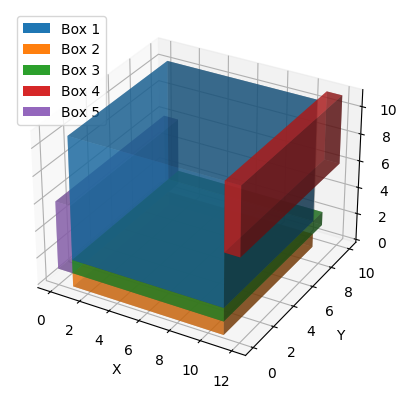

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def adjust_dimensions(w, h, d, X_w, Z_w, Y_h, Z_d):
    """Adjust dimensions based on orientation flags."""
    if X_w==0 and Z_w==0 and Y_h==0 and Z_d==0:
        dx, dy, dz = d, w, h
    elif X_w==0 and Z_w==0 and Y_h==0 and Z_d==1:
        dx, dy, dz = h, w, d
    elif X_w==0 and Z_w==1 and Y_h==0 and Z_d==0:
        dx, dy, dz = h, d, w
    elif X_w==0 and Z_w==1 and Y_h==1 and Z_d==0:
        dx, dy, dz = d, h, w
    elif X_w==1 and Z_w==0 and Y_h==0 and Z_d==0:
        dx, dy, dz = w, d, h
    elif X_w==1 and Z_w==0 and Y_h==1 and Z_d==1:
        dx, dy, dz = w, h, d
    return dx, dy, dz

# Initialize the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Coordinates, dimensions, and orientation flags for each box
coordinates = [(x[i].varValue, y[i].varValue, z[i].varValue) for i in range(n_boxes)]
dimensions = [(df.Width[i], df.Height[i], df.Depth[i]) for i in range(n_boxes)]
orientation_flags = [(X_w[i].varValue, Z_w[i].varValue, Y_h[i].varValue, Z_d[i].varValue) for i in range(n_boxes)]

packed = [(s[i].varValue) for i in range(n_boxes)]

# Create empty lists to store custom legend information
legend_patches = []
legend_labels = []

# Plot each box
for i, ((x, y, z), (w, h, d), (X_w, Z_w, Y_h, Z_d), (s)) in enumerate(zip(coordinates, dimensions, orientation_flags, packed)):
    if s == 1.0:
        color = f'C{i}'  # Color for the box

        # Adjust dimensions
        dx, dy, dz = adjust_dimensions(w, h, d, X_w, Z_w, Y_h, Z_d)

        ax.bar3d(x, y, z, dx, dy, dz, color=color, alpha=0.6)

        # Legend preparation
        patch = plt.Rectangle((0, 0), 1, 1, fc=color)
        legend_patches.append(patch)
        legend_labels.append(f'Box {i + 1}')
    else:
        pass

# Setting up axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adding custom legend
ax.legend(legend_patches, legend_labels, loc=2)

plt.show()

TypeError: 'float' object is not subscriptable

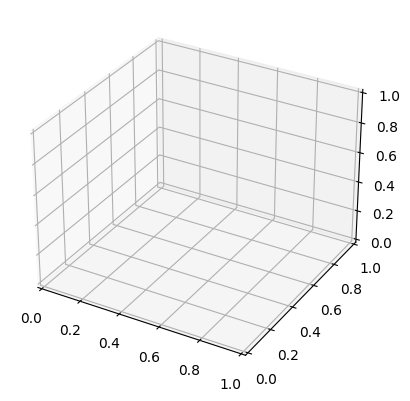

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def adjust_dimensions(w, h, d, X_w, Z_w, Y_h, Z_d):
    """Adjust dimensions based on orientation flags."""
    if X_w==0 and Z_w==0 and Y_h==0 and Z_d==0:
        dx, dy, dz = d, w, h
    elif X_w==0 and Z_w==0 and Y_h==0 and Z_d==1:
        dx, dy, dz = h, w, d
    elif X_w==0 and Z_w==1 and Y_h==0 and Z_d==0:
        dx, dy, dz = h, d, w
    elif X_w==0 and Z_w==1 and Y_h==1 and Z_d==0:
        dx, dy, dz = d, h, w
    elif X_w==1 and Z_w==0 and Y_h==0 and Z_d==0:
        dx, dy, dz = w, d, h
    elif X_w==1 and Z_w==0 and Y_h==1 and Z_d==1:
        dx, dy, dz = w, h, d
    return dx, dy, dz

# Initialize the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Coordinates, dimensions, and orientation flags for each box
coordinates = [(x[i].varValue, y[i].varValue, z[i].varValue) for i in range(n_boxes)]
dimensions = [(df.Width[i], df.Height[i], df.Depth[i]) for i in range(n_boxes)]
orientation_flags = [(X_w[i].varValue, Z_w[i].varValue, Y_h[i].varValue, Z_d[i].varValue) for i in range(n_boxes)]

packed = [(s[i].varValue) for i in range(n_boxes)]

# Create empty lists to store custom legend information
legend_patches = []
legend_labels = []

# Plot each box
for i, ((x, y, z), (w, h, d), (X_w, Z_w, Y_h, Z_d), (s)) in enumerate(zip(coordinates, dimensions, orientation_flags, packed)):
    if s == 1.0:
        color = f'C{i}'  # Color for the box

        # Adjust dimensions
        dx, dy, dz = adjust_dimensions(w, h, d, X_w, Z_w, Y_h, Z_d)

        ax.bar3d(x, y, z, dx, dy, dz, color=color, alpha=0.6)

        # Legend preparation
        patch = plt.Rectangle((0, 0), 1, 1, fc=color)
        legend_patches.append(patch)
        legend_labels.append(f'Box {i + 1}')
    else:
        pass

# Setting up axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adding custom legend
ax.legend(legend_patches, legend_labels, loc=2)

plt.show()

In [8]:
# Sort boxes by volume
boxes.sort(key=lambda x: x[0]*x[1]*x[2], reverse=True)

# Initialize container grid as a 3D array
container = [[[0 for _ in range(D)] for _ in range(H)] for _ in range(W)]

def check_fit(x, y, z, box):
    w, h, d = box
    if x+w > W or y+h > H or z+d > D:
        return False
    
    for dx in range(w):
        for dy in range(h):
            for dz in range(d):
                if container[x+dx][y+dy][z+dz] == 1:
                    return False
                
    return True

def place_box(x, y, z, box):
    w, h, d = box
    for dx in range(w):
        for dy in range(h):
            for dz in range(d):
                container[x+dx][y+dy][z+dz] = 1

packed_boxes = []
for box in boxes:
    for x in range(W):
        for y in range(H):
            for z in range(D):
                if check_fit(x, y, z, box):
                    place_box(x, y, z, box)
                    packed_boxes.append({"coordinates": (x, y, z), "dimensions": box})
                    break

print(f"Packed boxes: {packed_boxes}")


Packed boxes: [{'coordinates': (0, 0, 0), 'dimensions': [9, 9, 10]}, {'coordinates': (9, 0, 0), 'dimensions': [1, 5, 10]}, {'coordinates': (9, 5, 0), 'dimensions': [1, 5, 10]}]


In [10]:
packed_boxes[0]

{'coordinates': (0, 0, 0), 'dimensions': [9, 9, 10]}

In [11]:
packed_boxes[1]

{'coordinates': (9, 0, 0), 'dimensions': [1, 5, 10]}

In [12]:
packed_boxes[2]

{'coordinates': (9, 5, 0), 'dimensions': [1, 5, 10]}

In [15]:
coordinates

[(1.0, 1.0, 1.0),
 (0.0, 0.0, 1.0),
 (0.0, 1.0, 0.0),
 (5.0, 11.0, 0.0),
 (5.0, 0.0, 0.0)]

In [16]:
dimensions

[(9, 9, 10), (9, 10, 1), (10, 10, 1), (1, 5, 10), (1, 5, 10)]

In [17]:
packed

[1.0, 1.0, 1.0, 1.0, 1.0]

In [9]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum
import pulp

# Initialize the problem with the LpMaximize goal
lp_problem = LpProblem(name="My_LP_Problem", sense=LpMaximize)

# Define the decision variables
x1 = LpVariable(name="x1", lowBound=0)
x2 = LpVariable(name="x2", lowBound=0)

# Add the objective function to the problem
lp_problem += lpSum([4*x1, 3*x2]), "Z"

# Add the constraints
lp_problem += (2*x1 + x2 <= 8, "Constraint_1")
lp_problem += (x1 + 2*x2 <= 6, "Constraint_2")

# Solve the problem
lp_problem.solve()

# Output results
print(f"Status: {lp_problem.status}, {pulp.LpStatus[lp_problem.status]}")
print(f"x1 = {x1.varValue}")
print(f"x2 = {x2.varValue}")
print(f"Objective function value = {lp_problem.objective.value()}")



Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /var/tmp/473ad2d6a95d4793880fd69f4b74f6dc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/tmp/473ad2d6a95d4793880fd69f4b74f6dc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 6.9999998 (2)
0  Obj -0 Dual inf 6.9999998 (2)
2  Obj 17.333333
Optimal - objective value 17.333333
Optimal objective 17.33333333 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Status: 1, Optimal
x1 = 3.3333333
x2 = 1.3333333
Object